# Projet Notations de films 

Introduction, expliquer le contexte, démarche, objectif, etc ..................................

### importation des librairies et fichiers

In [ ]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension
!pip install lxml
!pip install aiohttp
!pip install nest_asyncio

import asyncio
import aiohttp
import pandas as pd
from bs4 import BeautifulSoup
import re
import nest_asyncio


In [6]:
# Importation des librairies

# import seaborn as sns #pas besoin si utilise fonctions
import matplotlib.pyplot as plt

# Regression
import statsmodels.api as sm
from statsmodels.formula.api import rlm 

In [7]:
import os

# Importation des fichiers python (contenant des fonctions) crées dans le cadre des 3 parties du projet :

for f in os.listdir('A_Base_de_données'):
    if f.endswith('.py'):
        module_name = os.path.splitext(f)[0]
        exec(f"from A_Base_de_données.{module_name} import *")


for f in os.listdir('B_Analyse_descriptive'):
    if f.endswith('.py'):
        module_name = os.path.splitext(f)[0]
        exec(f"from B_Analyse_descriptive.{module_name} import *")


for f in os.listdir('C_Modele'):
    if f.endswith('.py'):
        module_name = os.path.splitext(f)[0]
        exec(f"from C_Modele.{module_name} import *")


## I - Création de la base de données

### Webscrapping AlloCiné

In [ ]:
# Récupération d'une liste de films qui possèdent tous une note moyenne de spectateur et une note moyenn de presse entre l'année .... et l'année .....
base_films = get_base_films(2010, 2022)


# Récupération pour chaque film de différentes caractériques
nest_asyncio.apply()
base_films_enrichie = get_carac_film(base_films)


In [10]:
base_films_enrichie


,titre,identifiant,date,durée,auteur,spectateur,presse,genre1,genre2,genre3,...,date_sortie_bluray,date_sortie_vod,type_film,budget,langues,format_production,couleur,format_audio,format_projection,num_visa
0,Rien à déclarer,173528,26 janvier 2011,1h 48min,Dany Boon,"2,4","2,2",Comédie,,,...,15/06/2011,15/06/2011,Long métrage,-,"Flamand, Français",-,Couleur,-,-,125668
1,Les petits mouchoirs,146632,20 octobre 2010,2h 34min,Guillaume Canet,"3,6","2,9",Comédie dramatique,,,...,23/02/2011,01/03/2016,Long métrage,17 000 000 EUR,Français,-,Couleur,-,-,121 898
2,L'Agence tous risques,133588,16 juin 2010,1h 54min,Joe Carnahan,"3,2","3,2",Action,Comédie,,...,03/11/2010,01/06/2015,Long métrage,110 000 000 USD,"Anglais, Français, Espagnol, Swahili",-,Couleur,-,-,-
3,Shutter Island,132039,24 février 2010,2h 17min,Martin Scorsese,"4,4","3,8",Thriller,,,...,24/06/2010,15/10/2017,Long métrage,80 000 000 USD,"Anglais, Allemand",-,Couleur,-,-,124145
4,Incendies,179349,12 janvier 2011,2h 03min,Denis Villeneuve,"4,3","3,8",Drame,,,...,-,12/05/2011,Long métrage,-,"ARABIC, Français",-,Couleur,-,-,128172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,Quelques jours de répit,134462,27 avril 2011,1h 20min,Amor Hakkar,"3,0","2,7",Drame,,,...,-,-,Long métrage,-,Français,-,Couleur,-,-,125803
482,Adrienn Pàl,130423,25 juillet 2012,2h 16min,Agnes Kocsis,"2,6","3,6",Drame,,,...,-,-,Long métrage,-,Hongrois,-,Couleur,-,-,122485
483,Ich bin eine Terroristin,198778,6 juin 2012,1h 37min,Valerie Gaudissart,"2,7","2,5",Comédie,Famille,,...,-,25/04/2023,Long métrage,-,Français,-,Couleur,-,-,120146
484,Exit una storia personale,186074,23 février 2011,1h 20min,Massimiliano Amato,"3,0","2,8",Drame,,,...,-,27/09/2018,Long métrage,-,"Anglais, Italien",HD,Couleur,Dolby SR,-,-


In [ ]:
# Exportation en CSV => mettre en commentaire lors du rendu afin que cela soit toujours le même CSV qui soit utilisé par la suite




### Ajout et création de variables

In [ ]:
# Lecture du CSV


In [6]:
# Ajout du genre des réalisateurs
table_avec_genre = get_genre_individuel(base_films, 'auteur')

# Aperçu du nb de réalisateurs m vs f
table_avec_genre['genre_ind'].value_counts()


genre_ind
m      323
f       36
m,f     15
f,m      3
Name: count, dtype: int64

In [7]:
table_avec_genre.head()

,genre_ind,titre,identifiant,date,durée,auteur,spectateur,presse,genre1,genre2,genre3
0,m,Very Bad Cops,144195,27 octobre 2010,1h 47min,Adam McKay,"2,5","3,3",Action,Comédie,
1,f,Adrienn Pàl,130423,25 juillet 2012,2h 16min,Agnes Kocsis,"2,6","3,6",Drame,,
2,m,Une vie de chat,125119,15 décembre 2010,1h 10min,Alain Gagnol,"3,8","3,6",Animation,Policier,
3,m,Le Plan B,141699,19 mai 2010,1h 47min,Alan Poul,"2,4","2,2",Comédie,Romance,
4,m,Le Livre d'Eli,128955,20 janvier 2010,1h 49min,Albert Hughes,"3,3","2,4",Science Fiction,,


In [8]:
# Transformation des types de films en variables dummy 
dummies1 = pd.get_dummies(table_avec_genre['genre1'], prefix='genre')
dummies2 = pd.get_dummies(table_avec_genre['genre2'], prefix='genre')
dummies3 = pd.get_dummies(table_avec_genre['genre3'], prefix='genre')

dummies1 = dummies1.astype(int)
dummies2 = dummies2.astype(int)
dummies3 = dummies3.astype(int)

dummies_sum = dummies1.add(dummies2, fill_value=0).add(dummies3, fill_value=0)
dummies_sum = dummies_sum.drop(columns=['genre_'])

df = pd.concat([table_avec_genre, dummies_sum], axis=1)
print('nombre de films pris en compte :', len(df))

nombre de films pris en compte : 377


In [9]:
# Conversion des notes en décimale
table_avec_genre['spectateur'] = table_avec_genre['spectateur'].apply(mise_en_forme_decimale)
table_avec_genre['presse'] = table_avec_genre['presse'].apply(mise_en_forme_decimale)

In [10]:
# Création variable : différence de notation entre spectateur et presse
table_avec_genre['diff_notation'] = table_avec_genre['spectateur']-table_avec_genre['presse']
table_avec_genre.head()


,genre_ind,titre,identifiant,date,durée,auteur,spectateur,presse,genre1,genre2,genre3,diff_notation
0,m,Very Bad Cops,144195,27 octobre 2010,1h 47min,Adam McKay,2.5,3.3,Action,Comédie,,-0.8
1,f,Adrienn Pàl,130423,25 juillet 2012,2h 16min,Agnes Kocsis,2.6,3.6,Drame,,,-1.0
2,m,Une vie de chat,125119,15 décembre 2010,1h 10min,Alain Gagnol,3.8,3.6,Animation,Policier,,0.2
3,m,Le Plan B,141699,19 mai 2010,1h 47min,Alan Poul,2.4,2.2,Comédie,Romance,,0.2
4,m,Le Livre d'Eli,128955,20 janvier 2010,1h 49min,Albert Hughes,3.3,2.4,Science Fiction,,,0.9


In [11]:
table_avec_genre = get_annee(table_avec_genre, 'date')

In [12]:
# Conversion de la durée en minutes
table_avec_genre['durée'] = table_avec_genre['durée'].astype('string')
table_avec_genre['duree_min'] = table_avec_genre['durée'].apply(duree_en_minutes)

## II -  Analyse descriptive

 QUELS AXES CHOISIR ? 
Donnés à titre d'exemple.... :
 - Analyse générales 
 - différence presse vs spec 
 - genre du réalisateur et budget alloué 
  

### Généralités

Dropdown(description='Genre 1 :', index=3, options=('Drame', 'Comédie', 'Comédie dramatique', 'Action', 'Avent…

Dropdown(description='Genre 2 :', index=9, options=('Drame', 'Comédie', 'Comédie dramatique', 'Action', 'Avent…

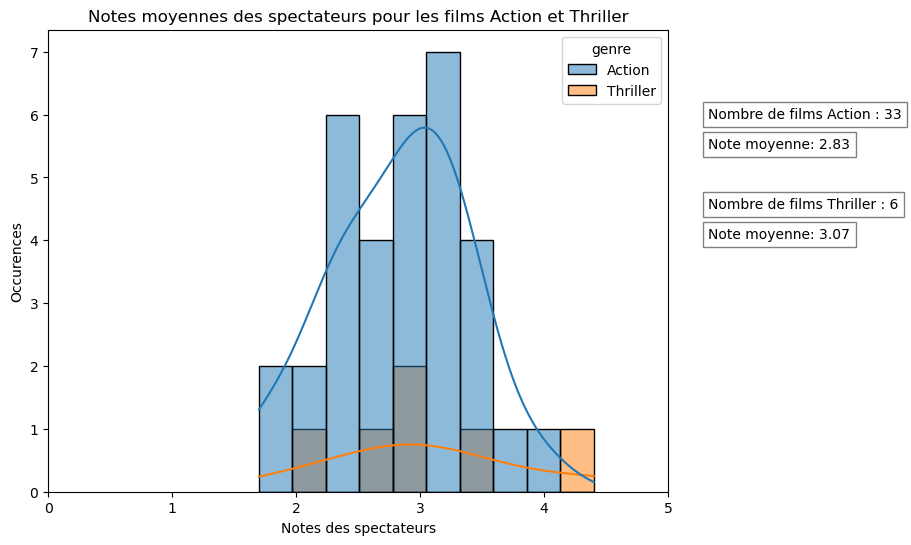

In [ ]:
graphique_genre_film(table_avec_genre)  

### Notations spectateurs et presse

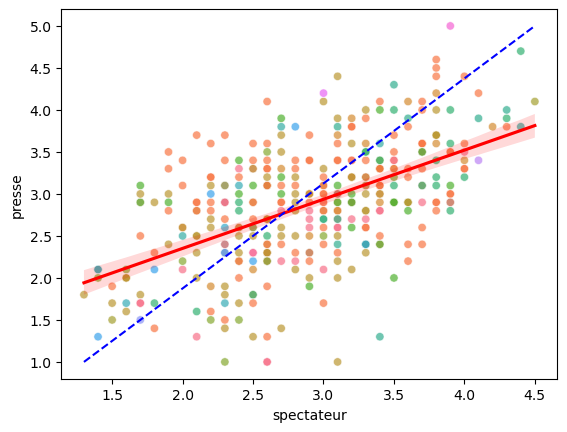

In [14]:
# On pourrait affiner en fonction de la typologie de la presse définie par exemple

sns.scatterplot(data=table_avec_genre, x='spectateur', y='presse',hue='genre1', alpha=0.7, edgecolor='w', linewidth=0.5, legend = False)

sns.regplot(data=table_avec_genre, x='spectateur', y='presse', scatter=False, color='red')

plt.plot([min(table_avec_genre['spectateur']), max(table_avec_genre['spectateur'])], [min(table_avec_genre['presse']), max(table_avec_genre['presse'])], color='blue', linestyle='--')




### Genre du réalisateur et budget des films

Dropdown(description='Genre du film :', index=10, options=('Drame', 'Comédie', 'Comédie dramatique', 'Action',…

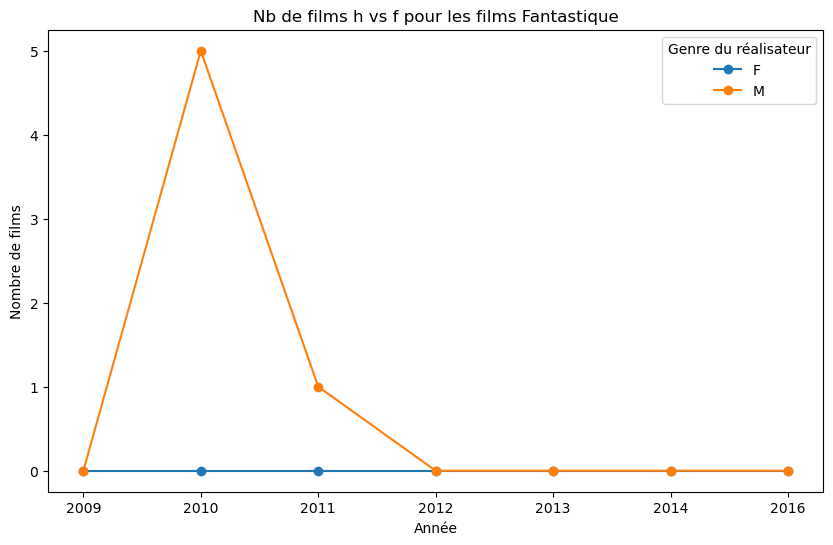

In [15]:
graphique_h_f(table_avec_genre)

### Base CNC : Analyse du type de devis, obtenus par les réalisateurs vs les réalisatrices

Une base du CNC nous donne ce type d'information : les sociétés productrices et distributrices des films, chaînes de télévision partenaires en préachat. Je veux étudier les différences de montant des devis selon le genre du réalisateur.


In [ ]:
#Ici, j'importe les données du CNC en utilisant un API.
import requests
import pandas as pd
api_root = "https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/cnc-production-cinematographique-liste-des-films-agrees/exports/json?limit=-1"
response = requests.get(api_root)
films_cnc_brut = response.json() #je mets tout dans un dico json
print(response.content[:1000])

films_cnc = pd.json_normalize(films_cnc_brut) 
films_cnc.head(10)

In [ ]:
#Création d'une typologie des devis (je reprends les critères de l'article)
films_cnc["type_de_devis"] = pd.cut(films_cnc.devis, [0,2000000,4000000,7000000, 16000000], right=False)
films_cnc["type_de_devis"]= films_cnc["type_de_devis"].cat.rename_categories(["catégorie 1", "catégorie 2", "catégorie 3", "catégorie 4"])
films_cnc.head()


à noter : dans l'article, ils créent une cinquième catégorie rassemblant "les sociétés de production et les sociétés de distribution qui n’ont produit ou distribué qu’un ou deux longs-métrages d’initiative française sur la période de trois ans étudiée. Cette catégorie 9 regroupe donc des producteurs et des distributeurs qui ont eu une très faible activité sur la période (plusieurs ont eu une courte durée de vie) ou encore des distributeurs liés à des majors américaines pour lesquels la distribution de FIF est une activité marginale. 272 films ont été produits et 70 distribués par de telles sociétés."

Par ailleurs, on peut également faire une typologie en fonction du type de distributeur (voir l'article également).


In [13]:
films_cnc["titre"].nunique()

4600

J'essaie ici de préciser le genre du réalisateur. Dans le cas où le réalisateur est un homme, j'attribue à ma variable genre "m", dans le cas où c'est une femme, j'attribue à ma variable genre "f". Si c'est les deux, "plusieurs réalisateurs".

Je rencontre plusieurs difficultés : déjà j'ai plusieurs réalisateurs par films parfois. J'ai donc essayer de créer une fonction qui me crée une variable par réalisateur (j'ai un petit problème ici). Ensuite l'idée est de créer la variable genre décrite ci-dessus, puis de passer aux analyses.

In [ ]:
#à affiner : créer une colonne réalisateur 2
test = films_cnc["realisateur"].str.split(pat= '/', expand=True) 
test #j'obtiens le nombre de films réalisés par plusieurs réalisateurs

0     2818
1      306
2       21
3        7
4        6
5        5
6        5
7        3
8        1
9        1
10       1
11       1
12       1
dtype: int64


In [ ]:
n_unique_per_column = test.nunique()
print(n_unique_per_column)

In [47]:
realisateur_split = films_cnc["realisateur"].str.split(pat='/', expand=True, regex=True)
realisateur_split

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,DESPENTES Virginie,None,None,None,None,None,None,None,None,None,None,None,None
1,BENAMOU Nicolas,None,None,None,None,None,None,None,None,None,None,None,None
2,DE MISSOLZ Jérôme,None,None,None,None,None,None,None,None,None,None,None,None
3,SCHOELLER Pierre,None,None,None,None,None,None,None,None,None,None,None,None
4,KLAPISCH Cédric,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4615,DUQUESNE Vincent,None,None,None,None,None,None,None,None,None,None,None,None
4616,NAKACHE Géraldine,None,None,None,None,None,None,None,None,None,None,None,None
4617,TY Theodore,None,None,None,None,None,None,None,None,None,None,None,None
4618,SAMANI Laura,None,None,None,None,None,None,None,None,None,None,None,None


In [48]:

def add_realisateur_columns(df):
    """
    Cette fonction crée une variable par réalisateur (quand ces derniers sont nombreux)
    """
    # Création d'un dataframe contenant un realisateur par colonne
    realisateur_split = df["realisateur"].str.split(pat='/', expand=True, regex=True)

    # Renommer les colonnes pour correspondre à "réalisateur_1", "réalisateur_2", etc.
    realisateur_split.columns = [f"réalisateur_{i+1}" for i in range(realisateur_split.shape[1])]

    # Remplacer les valeurs manquantes par 0
    realisateur_split = realisateur_split.fillna("0")

    # Ajouter les nouvelles colonnes au DataFrame original
    df = pd.concat([df, realisateur_split], axis=1)

    return df


In [49]:
films_cnc = add_realisateur_columns(films_cnc)
films_cnc

,visa,titre,realisateur,producteurs,devis,genre,eof,rang,asr,payante,...,réalisateur_4,réalisateur_5,réalisateur_6,réalisateur_7,réalisateur_8,réalisateur_9,réalisateur_10,réalisateur_11,réalisateur_12,réalisateur_13
0,117042,BYE BYE BLONDIE,DESPENTES Virginie,MASTER MOVIES / RED STAR CINEMA / WILD BUNCH,4103906.0,Fiction,None,2,avant,None,...,0,0,0,0,0,0,0,0,0,0
1,127028,DE L'HUILE SUR LE FEU,BENAMOU Nicolas,AXEL FILMS / RECIFILMS / SARL PASTRAMI CORP / ...,3320336.0,Fiction,None,1,None,None,...,0,0,0,0,0,0,0,0,0,0
2,124421,DES JEUNES GENS MODERNES,DE MISSOLZ Jérôme,ARTE FRANCE CINEMA / LOVE STREAMS AGNES B. PRO...,815248.0,Documentaire,None,2,None,None,...,0,0,0,0,0,0,0,0,0,0
3,123383,EXERCICE DE L'ETAT (L'),SCHOELLER Pierre,ARCHIPEL 35 / FRANCE 3 CINEMA,6548121.0,Fiction,None,3,avant,None,...,0,0,0,0,0,0,0,0,0,0
4,124350,MA PART DU GATEAU,KLAPISCH Cédric,CE QUI ME MEUT - MOTION PICTURES / FRANCE 2 CI...,7885486.0,Fiction,None,3,None,None,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4615,150436,Garder ton nom,DUQUESNE Vincent,ELÉMIAH,1834218.0,Fiction,OUI,1,None,[C+],...,0,0,0,0,0,0,0,0,0,0
4616,149831,J'irai ou tu iras,NAKACHE Géraldine,NORD-OUEST FILMS / MARS CINÉMA,5465545.0,Fiction,OUI,3,None,"[C+, Ciné+]",...,0,0,0,0,0,0,0,0,0,0
4617,148802,Maria,TY Theodore,SIMPATICO (MAIN JOURNEY),27614575.0,Animation,OUI,1,None,[C+],...,0,0,0,0,0,0,0,0,0,0
4618,151720,Small body,SAMANI Laura,TOMSA FILMS,2062780.0,Fiction,NON,1,None,None,...,0,0,0,0,0,0,0,0,0,0


In [52]:
films_cnc.columns

Index(['visa', 'titre', 'realisateur', 'producteurs', 'devis', 'genre', 'eof',
       'rang', 'asr', 'payante', 'clair', 'nationalite', 'date',
       'decomposition', 'aides', 'type_de_devis', 'réalisateur_1',
       'réalisateur_2', 'réalisateur_3', 'réalisateur_4', 'réalisateur_5',
       'réalisateur_6', 'réalisateur_7', 'réalisateur_8', 'réalisateur_9',
       'réalisateur_10', 'réalisateur_11', 'réalisateur_12', 'réalisateur_13',
       'réalisateur_1', 'réalisateur_2', 'réalisateur_3', 'réalisateur_4',
       'réalisateur_5', 'réalisateur_6', 'réalisateur_7', 'réalisateur_8',
       'réalisateur_9', 'réalisateur_10', 'réalisateur_11', 'réalisateur_12',
       'réalisateur_13', 'réalisateur_1', 'réalisateur_2', 'réalisateur_3',
       'réalisateur_4', 'réalisateur_5', 'réalisateur_6', 'réalisateur_7',
       'réalisateur_8', 'réalisateur_9', 'réalisateur_10', 'réalisateur_11',
       'réalisateur_12', 'réalisateur_13', 'réalisateur_1', 'réalisateur_2',
       'réalisateur_3', 'ré

In [ ]:
films_cnc["réalisateur_13"] = films_cnc["réalisateur_13"].astype(str) #je convertis tout en chaîne de caractère

In [51]:
films_cnc["réalisateur_13"].nunique()

réalisateur_13    2
réalisateur_13    2
réalisateur_13    2
réalisateur_13    2
dtype: int64

In [50]:
films_cnc.loc[films_cnc["réalisateur_13"] != "0"]


ValueError: Cannot index with multidimensional key

Je vais éliminer de l'analyse les films réalisés par plus de 3 réalisateurs. Au total, j'en ai ...

In [ ]:
#J'intègre le genre dans ma base de données
def get_genre_individuel(dataframe, colonne, position):
    """  
    """
    base_prenom_genre = base_prenom()
    base_prenom_genre = base_prenom_genre.drop(columns=['04_fréquence'])

    # transformation du prénom en minuscule
    dataframe['prenom'] = dataframe[colonne].str.split().str[position].str.lower()

    base_avec_genre = pd.merge(base_prenom_genre, dataframe, on='prenom', how='inner')
    base_avec_genre_nettoyée = base_avec_genre.drop(labels='prenom', axis='columns')
    return base_avec_genre_nettoyée



In [ ]:
films_cnc_avec_genre = get_genre_individuel(films_cnc, 'realisateur', -1)
films_cnc_avec_genre

In [ ]:
films_cnc_avec_genre.size

films_cnc_avec_genre['genre_ind'].value_counts()


### Fusion base CNC et base allociné

J'effectue un test pour voir si la base CNC et la base allociné peuvent bien être fusionnées. Je récupère donc ces informations : ttes les infos cnc, les moyennes des notes presse et spectateur allociné. 

In [19]:
#Préparation de la base allociné pour le merge 
base_films_2010 = get_base_films(2010, 2010)
nest_asyncio.apply()
base_films_enrichie_2010 = get_carac_film(base_films_2010)

base_films_enrichie_2010['num_visa'] = base_films_enrichie_2010['num_visa'].str.replace(' ', '')

nombre de films récupérés :  491


In [23]:
inner_merge_cnc_allociné = pd.merge(left = films_cnc , right = base_films_enrichie_2010 , how='inner', left_on="visa", right_on='num_visa')

In [24]:
inner_merge_cnc_allociné

,visa,titre_x,realisateur,producteurs,devis,genre,eof,rang,asr,payante,...,date_sortie_bluray,date_sortie_vod,type_film,budget,langues,format_production,couleur,format_audio,format_projection,num_visa
0,122207,AO LE DERNIER NEANDERTAL,MALATERRE Jacques,FRANCE 2 CINEMA / UGC IMAGES / UGC YM,13398412.0,Fiction,None,1,None,None,...,-,01/12/2016,Long métrage,13 000 000 EUR,Français,-,Couleur,-,-,122207
1,122530,COURSIER,RENOH Hervé,BLACK MASK PRODUCTIONS / EUROPACORP / M6 FILMS...,9410932.0,Fiction,None,2,None,None,...,-,03/12/2019,Long métrage,-,Français,-,Couleur,-,-,122530
2,121405,MEUTE (LA),RICHARD Franck,LA FABRIQUE 2,2866560.0,Fiction,None,1,None,None,...,-,01/01/2016,Long métrage,2 500 000 EUR,Français,-,Couleur,-,-,121405
3,123656,REVOLTES DE L'ILE DU DIABLE (LES),HOLST M.,MACT PRODUCTIONS,5296837.0,Fiction,None,3,None,None,...,24/10/2012,23/03/2012,Long métrage,9 500 000 USD,"Norvégien, Suédois",-,Couleur,-,-,123656
4,120962,TOURNEE,AMALRIC Mathieu,ARTE FRANCE CINEMA / LE PREMIER POISSON,3515910.0,Fiction,None,2,avant,None,...,29/09/2016,30/10/2010,Long métrage,4 150 000 EUR,"Anglais, Français",35mm,Couleur,Dolby Digital,1.85 : 1,120962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,124018,MAMMUTH,KERVERN Gustave / DELEPINE Benoît,ARTE FRANCE CINEMA / DD PRODUCTIONS / GMT PROD...,2499161.0,Fiction,None,3 / 3,None,None,...,-,15/08/2015,Long métrage,2 000 000 USD,Français,35mm,Couleur,Dolby Digital,1.85 : 1,124018
164,121731,TETE AILLEURS (LA),PELLE Frédéric,7EME APACHE FILMS / BIANCA FILMS,1054741.0,Fiction,None,1,None,None,...,-,-,Long métrage,-,Français,-,Couleur,-,-,121731
165,123205,TETE EN FRICHE (LA),BECKER Jean,DD PRODUCTIONS / FRANCE 3 CINEMA / ICE 3 / KJB...,8274491.0,Fiction,None,3,None,None,...,-,23/10/2010,Long métrage,-,"Flamand, Français",35mm,Couleur,"Dolby Digital, DTS",2.35 : 1 Cinemascope,123205
166,122965,UN HOMME QUI CRIE,HAROUN Mahamat-Saleh,PILI FILMS,2066392.0,Fiction,None,3,avant,None,...,-,29/01/2011,Long métrage,2 000 000 EUR,Français,-,Couleur,-,-,122965


## Test de modèles sur la différence de notation

### ANOVA (sur premier genre)

### Regression

- Notes spectateurs

In [122]:
# Définir les variables dépendantes et indépendantes
X = df[['duree_min', 'genre_Action', 'genre_Animation', 'genre_Policier', 'genre_Thriller', 'genre_Science Fiction', 'genre_Drame', 'genre_Aventure']]
y = df['spectateur']
X = sm.add_constant(X)

# Régression linéaire OLS
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             spectateur   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     15.89
Date:                Sun, 03 Nov 2024   Prob (F-statistic):           2.22e-19
Time:                        19:22:41   Log-Likelihood:                -256.63
No. Observations:                 296   AIC:                             531.3
Df Residuals:                     287   BIC:                             564.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.71

- Notes presse

In [124]:
# Définir les variables dépendantes et indépendantes
X = df[['duree_min', 'genre_Action', 'genre_Animation', 'genre_Policier', 'genre_Thriller', 'genre_Science Fiction', 'genre_Drame', 'genre_Aventure']]
y = df['presse']
X = sm.add_constant(X)

# Régression linéaire OLS
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 presse   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     17.38
Date:                Sun, 03 Nov 2024   Prob (F-statistic):           4.49e-21
Time:                        19:23:34   Log-Likelihood:                -216.55
No. Observations:                 296   AIC:                             451.1
Df Residuals:                     287   BIC:                             484.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.29

- Différences de notations

In [125]:
# Définir les variables dépendantes et indépendantes
X = df[['duree_min', 'genre_Action', 'genre_Animation', 'genre_Policier', 'genre_Thriller', 'genre_Science Fiction', 'genre_Drame', 'genre_Aventure']]
y = df['diff_notation']
X = sm.add_constant(X)

# Régression linéaire OLS
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          diff_notation   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1.929
Date:                Sun, 03 Nov 2024   Prob (F-statistic):             0.0556
Time:                        19:25:00   Log-Likelihood:                -226.63
No. Observations:                 296   AIC:                             471.3
Df Residuals:                     287   BIC:                             504.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.57

In [126]:
# test robuste à l'hétéroscédasticité ?
model = rlm("diff_notation ~ duree_min + genre_Action + genre_Animation+genre_Policier+genre_Fantastique+genre_Drame+genre_Aventure", data=df).fit()
print(model.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:          diff_notation   No. Observations:                  296
Model:                            RLM   Df Residuals:                      288
Method:                          IRLS   Df Model:                            7
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 03 Nov 2024                                         
Time:                        19:25:14                                         
No. Iterations:                    16                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.5961      0.18